In [1]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont
import cv2
import matplotlib.image as mpimg

In [2]:
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A',
    'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [3]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\PycharmProjects\TMSds\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [18]:
def detect_and_draw(image_path):
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        predictions = model(image_tensor)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for element, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
        xmin, ymin, xmax, ymax = element
        class_name = CLASSES[label]
        label = f"{class_name}: {score:.2f}"
        draw.rectangle([(int(xmin), int(ymin)), (int(xmax), int(ymax))], outline="green", width=2)
        draw.text((int(xmin), int(ymin)), label, fill="green", font=font)
    image.show()
    output_image_path = "output_image.jpg"
    image.save(output_image_path)
input_image_path = "1.jpg"
detect_and_draw(input_image_path)

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp8ymm4ow9.PNG'


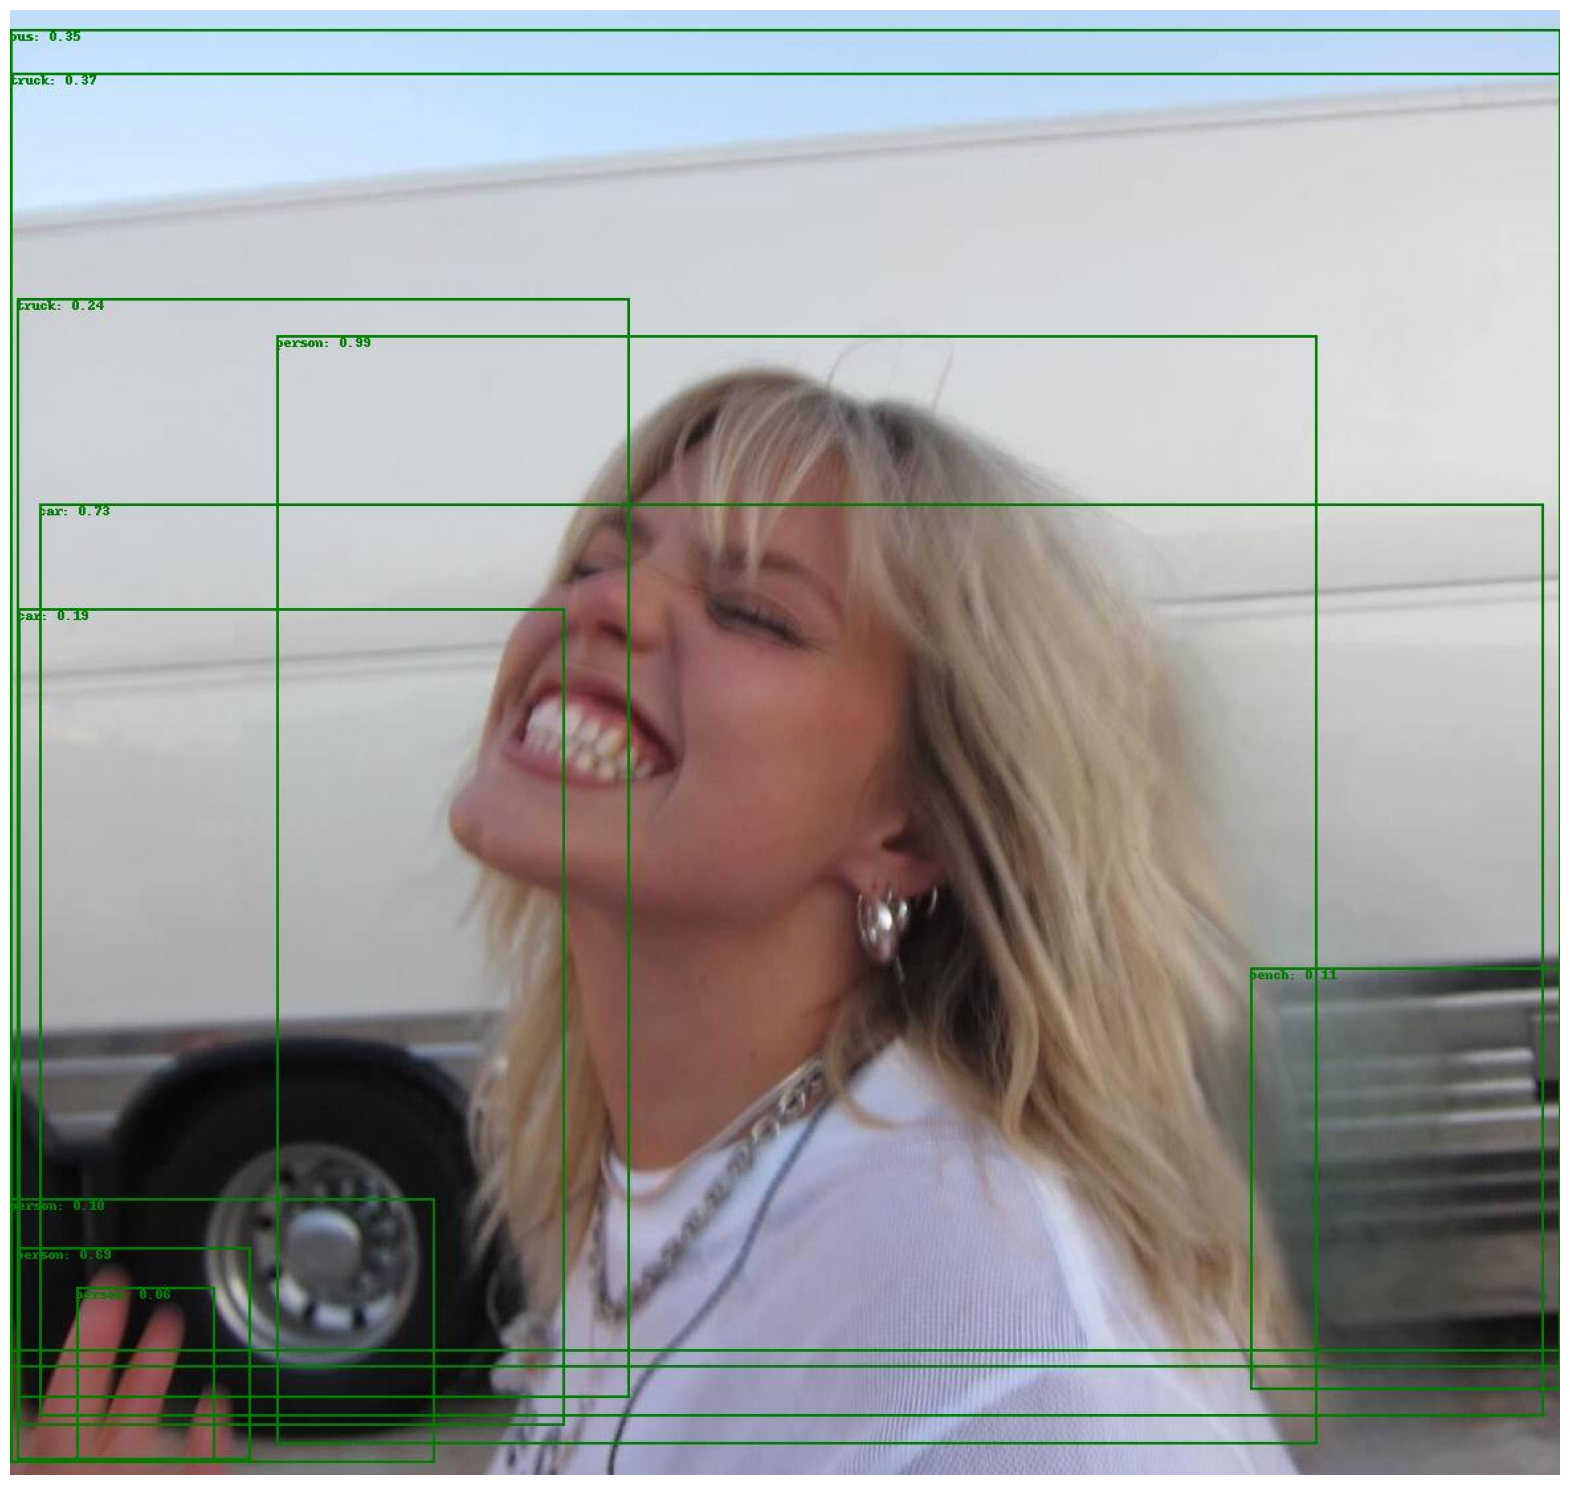

In [30]:
img = mpimg.imread('output_image.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off') 
plt.show()

In [28]:
def detect_and_draw(image_path):
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        predictions = model(image_tensor)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for element, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
        xmin, ymin, xmax, ymax = element
        class_name = CLASSES[label]
        label = f"{class_name}: {score:.2f}"
        draw.rectangle([(int(xmin), int(ymin)), (int(xmax), int(ymax))], outline="green", width=2)
        draw.text((int(xmin), int(ymin)), label, fill="green", font=font)
    image.show()
    output_image_path = "output_image1.jpg"
    image.save(output_image_path)
input_image_path = "2.jpg"
detect_and_draw(input_image_path)

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmptq_i59ns.PNG'


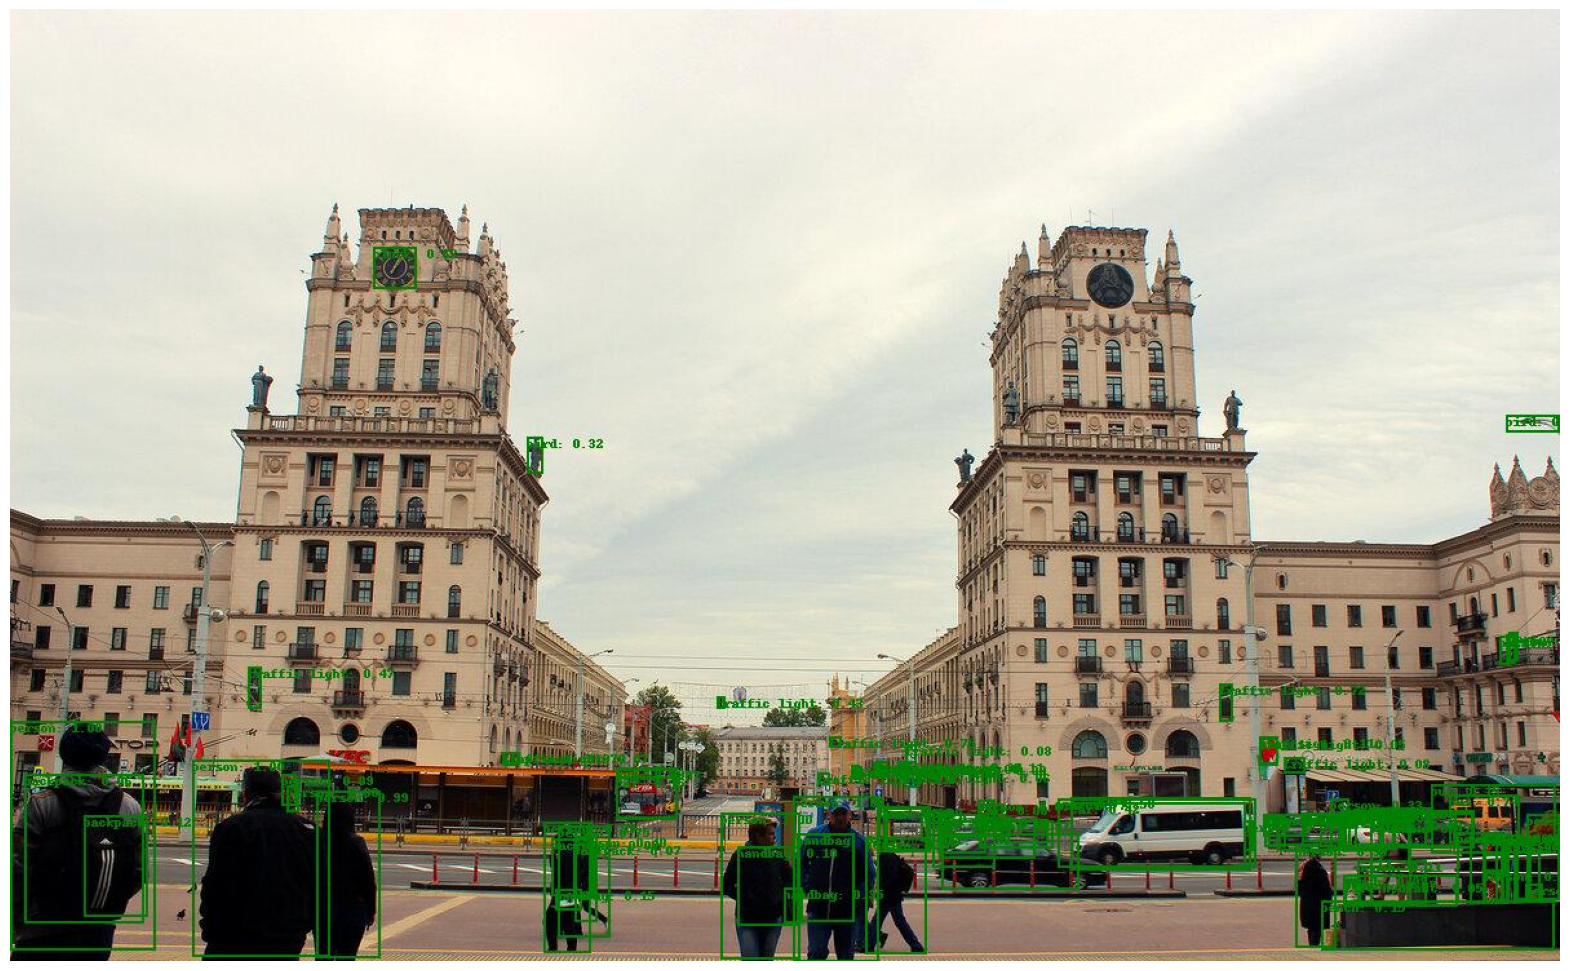

In [31]:
img = mpimg.imread('output_image1.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off') 
plt.show()

In [32]:
def detect_and_draw(image_path):
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        predictions = model(image_tensor)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for element, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
        xmin, ymin, xmax, ymax = element
        class_name = CLASSES[label]
        label = f"{class_name}: {score:.2f}"
        draw.rectangle([(int(xmin), int(ymin)), (int(xmax), int(ymax))], outline="green", width=2)
        draw.text((int(xmin), int(ymin)), label, fill="green", font=font)
    image.show()
    output_image_path = "output_image3.jpg"
    image.save(output_image_path)
input_image_path = "3.jpg"
detect_and_draw(input_image_path)

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp8ftg9ovh.PNG'


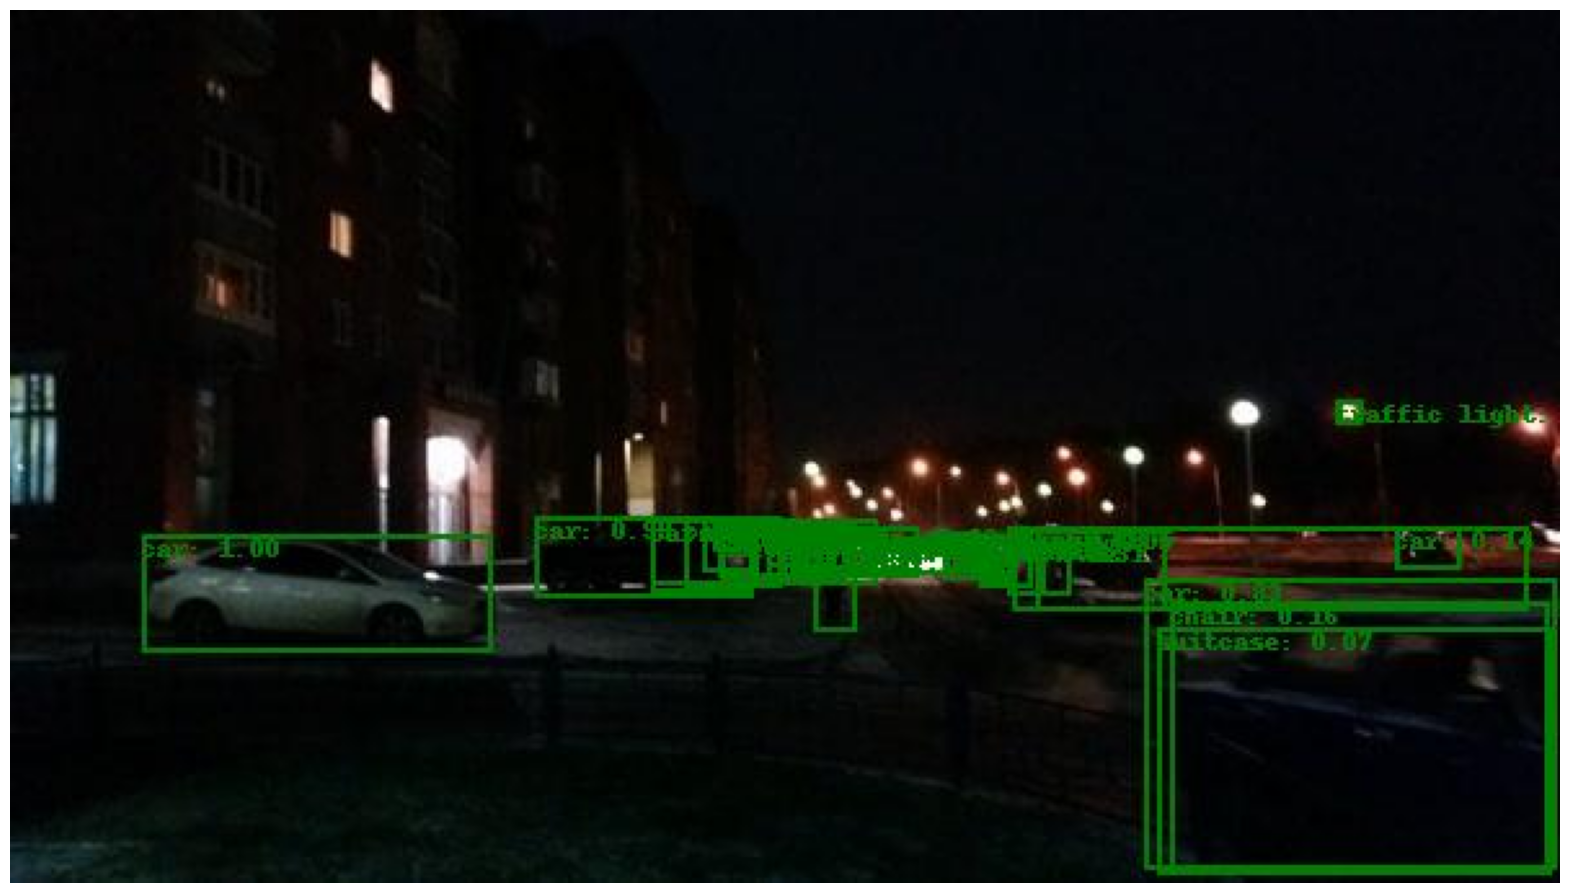

In [33]:
img = mpimg.imread('output_image3.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off') 
plt.show()

In [34]:
def detect_and_draw(image_path):
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        predictions = model(image_tensor)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for element, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
        xmin, ymin, xmax, ymax = element
        class_name = CLASSES[label]
        label = f"{class_name}: {score:.2f}"
        draw.rectangle([(int(xmin), int(ymin)), (int(xmax), int(ymax))], outline="green", width=2)
        draw.text((int(xmin), int(ymin)), label, fill="green", font=font)
    image.show()
    output_image_path = "output_image4.jpg"
    image.save(output_image_path)
input_image_path = "4.jpg"
detect_and_draw(input_image_path)

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp59jzhl96.PNG'


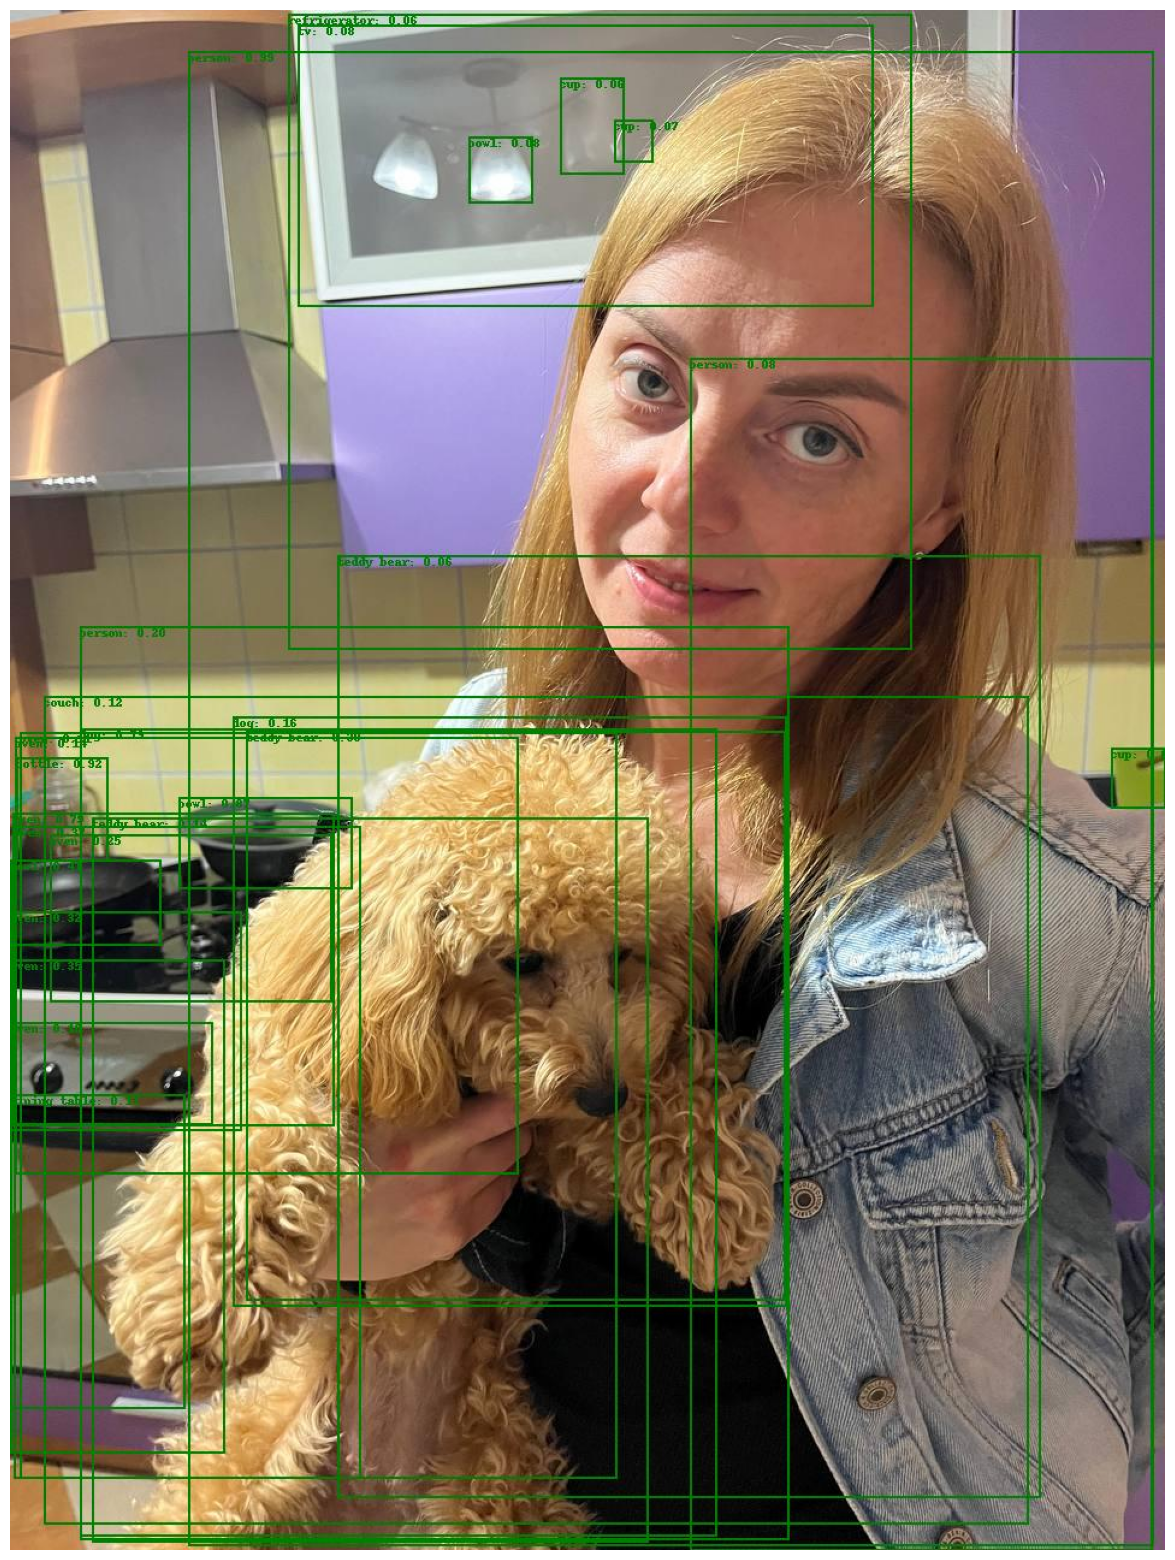

In [35]:
img = mpimg.imread('output_image4.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off') 
plt.show()